# Categorizing and tagging words   

** Several method : **
* Pretrained : POS-Tagging
* Create your own tagger : NGram Tagging, Perceptron, ...

** Evaluation performances **

Define a baseline with : 
* default tagger
* most common word

** Several tags : **

| Tag | Meaning | English Examples |
| ------------- |:----------------:|:----------------:|
| ADJ | adjective | new, good, high, special, big, local |
| ADP | adposition  | on, of, at, with, by, into, under |
| ADV  | adverb | really, already, still, early, now |
| CONJ  | conjunction |  and, or, but, if, while, although  |
|  DET | determiner, article  | the, a, some, most, every, no, which  |
| NOUN | noun | noun year, home, costs, time, Africa   |
| NUM |numeral | twenty-four, fourth, 1991, 14:24  |
| PRT  |particle  |  at, on, out, over per, that, up, with   |
| PRON | pronoun |   he, their, her, its, my, I, us  |
| VERB | verb |  is, say, told, given, playing, would  |
| "." | punctuation | " . , ; !"  |
|X | other  | ersatz, esprit, dunno, gr8, univeristy  |


Load package

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


import nltk
from nltk.corpus import brown
from nltk import word_tokenize, pos_tag


Load your text

In [2]:
text = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = word_tokenize(text)
print("My text : ", text)
print("My tokens : ", tokens)

My text :  I do not like green eggs and ham, I do not like them Sam I am!
My tokens :  ['I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham', ',', 'I', 'do', 'not', 'like', 'them', 'Sam', 'I', 'am', '!']


Load the data we will be using : Brown Corpus

In [3]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

## I/ Automatic tag

### Method 1 : Define a default tag, according to the most common tag in Brown Corpus

In [4]:
"""
Search the max tag in Brown Corpus
"""
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
print("Most common tag is : ", nltk.FreqDist(tags).max())

"""
Now we can create a tagger that tags everything as NN
"""
# Default Tagging
default_tagger = nltk.DefaultTagger('NN')
print("\nCheck results : ", default_tagger.tag(tokens))

# Performances : 
print("\nPerformance with default tagger : ", default_tagger.evaluate(brown_tagged_sents))

Most common tag is :  NN

Check results :  [('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'), ('I', 'NN'), ('am', 'NN'), ('!', 'NN')]

Performance with default tagger :  0.13089484257215028


### Method 2 : POS-Tagger

It's a pretrained model, based on Perceptron.

In [5]:
from nltk import word_tokenize, pos_tag

# Pos-Tagging
pos_tagger = nltk.pos_tag(tokens)
print("With POS_TAG : ", pos_tagger)

With POS_TAG :  [('I', 'PRP'), ('do', 'VBP'), ('not', 'RB'), ('like', 'IN'), ('green', 'JJ'), ('eggs', 'NNS'), ('and', 'CC'), ('ham', 'NN'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ('not', 'RB'), ('like', 'VB'), ('them', 'PRP'), ('Sam', 'NNP'), ('I', 'PRP'), ('am', 'VBP'), ('!', '.')]


### Method 3 : RegexTag

The regular expression tagger assigns tags to tokens on the basis of matching patterns. For instance, we might guess that any word ending in ed is the past participle of a verb, and any word ending with 's is a possessive noun. We can express these as a list of regular expressions:

In [6]:
text = 'all your base are belong to us all of your base base base'
type(text)

str

In [7]:
"""
Define your pattern
"""
patterns = [
    (r'.*ing$', 'VBG'),               # gerunds
    (r'.*ed$', 'VBD'),                # simple past
    (r'.*es$', 'VBZ'),                # 3rd singular present
    (r'.*ould$', 'MD'),               # modals
    (r'.*\'s$', 'NN$'),               # possessive nouns
    (r'.*s$', 'NNS'),                 # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'(The|the|A|a|An|an)$', 'AT'),   # articles 
    (r'.*able$', 'JJ'),                # adjectives 
    (r'.*ness$', 'NN'),                # nouns formed from adjectives
    (r'.*ly$', 'RB'),                  # adverbs
    (r'(He|he|She|she|It|it|I|me|Me|You|you)$', 'PRP'), # pronouns
    (r'(His|his|Her|her|Its|its)$', 'PRP$'),    # possesive
    (r'(my|Your|your|Yours|yours)$', 'PRP$'),   # possesive
    (r'(on|On|in|In|at|At|since|Since)$', 'IN'),# time prepopsitions
    (r'(for|For|ago|Ago|before|Before)$', 'IN'),# time prepopsitions
    (r'(till|Till|until|Until)$', 'IN'),        # time prepopsitions
    (r'(by|By|beside|Beside)$', 'IN'),          # space prepopsitions
    (r'(under|Under|below|Below)$', 'IN'),      # space prepopsitions
    (r'(over|Over|above|Above)$', 'IN'),        # space prepopsitions
    (r'(across|Across|through|Through)$', 'IN'),# space prepopsitions
    (r'(into|Into|towards|Towards)$', 'IN'),    # space prepopsitions
    (r'(onto|Onto|from|From)$', 'IN'),          # space prepopsitions    
    (r'\.$','.'), (r'\,$',','), (r'\?$','?'),    # fullstop, comma, Qmark
    (r'\($','('), (r'\)$',')'),             # round brackets
    (r'\[$','['), (r'\]$',']'),             # square brackets
    (r'(Sam)$', 'NAM'),
    # WARNING : Put the default value in the end
    (r'.*', 'NN')                      # nouns (default)
    ]

"""
Construct tager
"""
regexp_tagger = nltk.RegexpTagger(patterns)

# We use the sentence : brown_sents[3]
print(regexp_tagger.tag(brown_sents[3]))
print(regexp_tagger.evaluate(brown_tagged_sents))

# We use our sentence :
print(regexp_tagger.tag(tokens))
print(regexp_tagger.evaluate(brown_tagged_sents))

[('``', 'NN'), ('Only', 'RB'), ('a', 'AT'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', ','), ('the', 'AT'), ('jury', 'NN'), ('said', 'NN'), (',', ','), ('``', 'NN'), ('considering', 'VBG'), ('the', 'AT'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('the', 'AT'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'AT'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', '.')]
0.4461085585854367
[('I', 'PRP'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NNS'), ('and', 'NN'), ('ham', 'NN'), (',', ','), ('I', 'PRP'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NAM'), ('I', 'PRP'), ('am', 'NN'), ('!', 'NN')]
0.4461085585854367


## II/ Train your own tagger

### Method 1 : NGram Tagging

The NgramTagger class uses a tagged training corpus to determine which part-of-speech tag is most likely for each context. Here we see a special case of an n-gram tagger, namely a bigram tagger. First we train it, then use it to tag untagged sentences:

#### Unigram

Unigram taggers are based on a simple statistical algorithm: for each token, assign the tag that is most likely for that particular token. For example, it will assign the tag JJ to any occurrence of the word frequent, since frequent is used as an adjective (e.g. a frequent word) more often than it is used as a verb (e.g. I frequent this cafe). A unigram tagger behaves just like a lookup tagger .

A unigram tagger behaves just like a lookup tagger, except there is a more convenient technique for setting it up, called training. In the following code sample, we train a unigram tagger, use it to tag a sentence, then evaluate.

We train a UnigramTagger by specifying tagged sentence data as a parameter when we initialize the tagger. The training process involves inspecting the tag of each word and storing the most likely tag for any word in a dictionary, stored inside the tagger

In [8]:
"""
UniGram-Tagging
"""
from nltk.corpus import brown

# Training
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

# Tag our text
unigram_tagger.tag(tokens)

# Evaluate 
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

achieves an accuracy of 93.5% -  This number is actually unreasonably high


In [9]:
"""
Train your own Unigram 
"""
# Create a train and test set
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

# Training : 
unigram_tagger = nltk.UnigramTagger(train_sents)

# Evaluate
print ("Evaluation 1gram on train set ", unigram_tagger.evaluate(train_sents))
print ("Evaluation 1gram on test set ", unigram_tagger.evaluate(test_sents))

Evaluation 1gram on train set  0.9353630649241612
Evaluation 1gram on test set  0.8121200039868434


#### Method 2 : Bigram

In [10]:
"""
BiGram-Tagging
"""
# Training the bigram tagger on a train set
bigram_tagger = nltk.BigramTagger(brown_tagged_sents)

# Tag our text
bigram_tagger.tag(tokens)

# Evaluate 
bigram_tagger.evaluate(brown_tagged_sents)

0.7892972929967977

In [11]:
"""
Train your own Bigram 
"""
# Create a train and test set
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

# Training the bigram tagger on a train set
bigram_tagger = nltk.BigramTagger(train_sents)

# Evaluate
print ("Evaluation 2gram on train set ", bigram_tagger.evaluate(train_sents))
print ("Evaluation 2gram on test set ", bigram_tagger.evaluate(test_sents))

Evaluation 2gram on train set  0.7884137382485832
Evaluation 2gram on test set  0.10206319146815508


Notice that the bigram tagger manages to tag every word in a sentence it saw during training, but does badly on an unseen sentence. As soon as it encounters a new word (i.e., 13.5), it is unable to assign a tag. It cannot tag the following word (i.e., million) even if it was seen during training, simply because it never saw it during training with a None tag on the previous word. Consequently, the tagger fails to tag the rest of the sentence. Its overall accuracy score is very low.

Notice that the bigram tagger manages to tag every word in a sentence it saw during training, but does badly on an unseen sentence. As soon as it encounters a new word (i.e., 13.5), it is unable to assign a tag. It cannot tag the following word (i.e., million) even if it was seen during training, simply because it never saw it during training with a None tag on the previous word. Consequently, the tagger fails to tag the rest of the sentence. Its overall accuracy score is very low

In [12]:
"""
TriGram-Tagging
"""
# Training the bigram tagger on a train set
Trigram_tagger = nltk.TrigramTagger(brown_tagged_sents)

# Tag our text
Trigram_tagger.tag(tokens)

# Evaluate 
Trigram_tagger.evaluate(brown_tagged_sents)

0.8198679316586113

In [13]:
"""
Train your own Trigram 
"""
# Create a train and test set
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

# Training the bigram tagger on a train set
Trigram_tagger = nltk.TrigramTagger(train_sents)

# Evaluate
print ("Evaluation 3gram on train set ", Trigram_tagger.evaluate(train_sents))
print ("Evaluation 3gram on test set ", Trigram_tagger.evaluate(test_sents))

Evaluation 3gram on train set  0.8216104550325339
Evaluation 3gram on test set  0.0626931127279976




** Combining tagger **

One way to address the trade-off between accuracy and coverage is to use the more accurate algorithms when we can, but to fall back on algorithms with wider coverage when necessary. For example, we could combine the results of a bigram tagger, a unigram tagger, and a default tagger, as follows:

* Try tagging the token with the bigram tagger.
* If the bigram tagger is unable to find a tag for the token, try the unigram tagger.
* If the unigram tagger is also unable to find a tag, use a default tagger.

In [14]:
"""
Mix Default, Unigram and Bigram
"""
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

print ("Evaluation mix default/1G/2G on train set ", t2.evaluate(train_sents))
print ("Evaluation mix default/1G/2G on test set ", t2.evaluate(test_sents))

"""
Combine Default, Unigram and Bigram
"""
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.TrigramTagger(train_sents, backoff=t2)
print ("\nEvaluation mix default/1G/2G/3G on train set ", t3.evaluate(train_sents))
print ("Evaluation mix default/1G/2G/3G on test set ", t3.evaluate(test_sents))


Evaluation mix default/1G/2G on train set  0.9736193811380784
Evaluation mix default/1G/2G on test set  0.8452108043456593

Evaluation mix default/1G/2G/3G on train set  0.9829321372941086
Evaluation mix default/1G/2G/3G on test set  0.843317053722715


### Method 2 : Perceptron tagger

In [15]:
# Create a train and test set
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

# Train the model 
from nltk.tag.perceptron import PerceptronTagger
pct_tag = PerceptronTagger(load=False)
pct_tag.train(train_sents)

# Check the performance 
print ("Evaluation Own PerceptronTagger on train set ", pct_tag.evaluate(train_sents))
print ("Evaluation Own PerceptronTagger on test set ", pct_tag.evaluate(test_sents))

Evaluation Own PerceptronTagger on train set  0.9930181946730593
Evaluation Own PerceptronTagger on test set  0.9246486594239012


# Annex : 

## I/ Make some statistics with tags

List of most common tags in Brown corpus : 
 [('NOUN', 30654), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('DET', 11389), ('ADJ', 6706), ('ADV', 3349), ('CONJ', 2717), ('PRON', 2535), ('PRT', 2264), ('NUM', 2166), ('X', 92)]


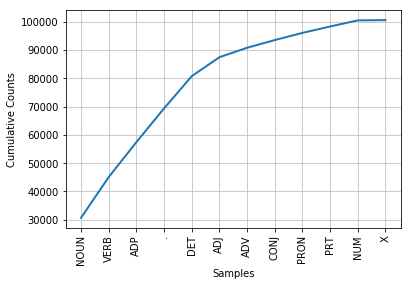

Les tags sont :  ['Sam']


In [16]:
""" 
which of these tags are the most common in the news category of the Brown corpus ? 
"""
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
print("List of most common tags in Brown corpus : \n", tag_fd.most_common())
tag_fd.plot(cumulative=True)

"""
Rechercher des tags specifiques """
def find_tags(tag_prefix, tokens):
    return [tokens for tokens, pos in pos_tag(tokens) if pos == tag_prefix]
mytag = find_tags("NNP", tokens)
print("Les tags sont : ", mytag)

## II/ Other langages

In [17]:
print("Modern Chinese ", nltk.corpus.sinica_treebank.tagged_words())
print("Indian : " , nltk.corpus.indian.tagged_words())
print("Portuguese : ", nltk.corpus.mac_morpho.tagged_words())
print("Brasil : ", nltk.corpus.conll2002.tagged_words())
print("Catalan : ", nltk.corpus.cess_cat.tagged_words())

Modern Chinese  [('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]
Indian :  [('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]
Portuguese :  [('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]
Brasil :  [('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]
Catalan :  [('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]


** Tagging unknown words **

Our approach to tagging unknown words still uses backoff to a regular-expression tagger or a default tagger. These are unable to make use of context. Thus, if our tagger encountered the word blog, not seen during training, it would assign it the same tag, regardless of whether this word appeared in the context the blog or to blog.



** Store your tagger **

In [22]:
""" STORE TAGGERS """
# save our tagger t2 
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

# we can load our saved tagger
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

# Check 
text = """The board's action shows what free enterprise is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

# Topic Modelling

Source : https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

# Chunking with NLTK
Source : https://pythonprogramming.net/chunking-nltk-tutorial/?completed=/part-of-speech-tagging-nltk-tutorial/


 # Final pipeline Preprocessing
 Source : https://nlpforhackers.io/building-a-nlp-pipeline-in-nltk/
 
